# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


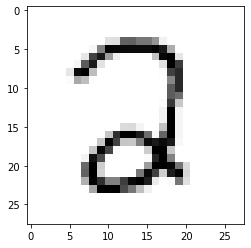

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2467
Training Accuracy: 0.6833, Testing Accuracy: 0.6885



Epoch 10, Loss 0.0735
Training Accuracy: 0.9337, Testing Accuracy: 0.9380



Epoch 20, Loss 0.0487
Training Accuracy: 0.9467, Testing Accuracy: 0.9582



Epoch 30, Loss 0.04
Training Accuracy: 0.9540, Testing Accuracy: 0.9642



Epoch 40, Loss 0.0354
Training Accuracy: 0.9588, Testing Accuracy: 0.9667



Epoch 50, Loss 0.0324
Training Accuracy: 0.9628, Testing Accuracy: 0.9688



Epoch 60, Loss 0.0303
Training Accuracy: 0.9647, Testing Accuracy: 0.9718



Epoch 70, Loss 0.0286
Training Accuracy: 0.9667, Testing Accuracy: 0.9733



Epoch 80, Loss 0.0273
Training Accuracy: 0.9680, Testing Accuracy: 0.9733



Epoch 90, Loss 0.0262
Training Accuracy: 0.9700, Testing Accuracy: 0.9753



Epoch 100, Loss 0.0252
Training Accuracy: 0.9710, Testing Accuracy: 0.9748



Epoch 110, Loss 0.0244
Training Accuracy: 0.9718, Testing Accuracy: 0.9738



Epoch 120, Loss 0.0236
Training Accuracy: 0.9732, Testing Accuracy: 0.9733



Epoch 130, Loss 0.0229
Training Accuracy: 0.9738, Testing Accuracy: 0.9728



Epoch 140, Loss 0.0223
Training Accuracy: 0.9742, Testing Accuracy: 0.9723



Epoch 150, Loss 0.0218
Training Accuracy: 0.9747, Testing Accuracy: 0.9718



Epoch 160, Loss 0.0212
Training Accuracy: 0.9760, Testing Accuracy: 0.9728



Epoch 170, Loss 0.0208
Training Accuracy: 0.9765, Testing Accuracy: 0.9723



Epoch 180, Loss 0.0203
Training Accuracy: 0.9773, Testing Accuracy: 0.9728



Epoch 190, Loss 0.0199
Training Accuracy: 0.9780, Testing Accuracy: 0.9733



Epoch 200, Loss 0.0194
Training Accuracy: 0.9784, Testing Accuracy: 0.9733



Epoch 210, Loss 0.019
Training Accuracy: 0.9791, Testing Accuracy: 0.9738



Epoch 220, Loss 0.0187
Training Accuracy: 0.9792, Testing Accuracy: 0.9743



Epoch 230, Loss 0.0183
Training Accuracy: 0.9795, Testing Accuracy: 0.9743



Epoch 240, Loss 0.018
Training Accuracy: 0.9797, Testing Accuracy: 0.9743



0.033989083725354724

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2472
Training Accuracy: 0.6510, Testing Accuracy: 0.6809



Epoch 10, Loss 0.1031
Training Accuracy: 0.9112, Testing Accuracy: 0.9158



Epoch 20, Loss 0.0794
Training Accuracy: 0.9288, Testing Accuracy: 0.9390



Epoch 30, Loss 0.0683
Training Accuracy: 0.9369, Testing Accuracy: 0.9481



Epoch 40, Loss 0.0617
Training Accuracy: 0.9419, Testing Accuracy: 0.9546



Epoch 50, Loss 0.0571
Training Accuracy: 0.9448, Testing Accuracy: 0.9561



Epoch 60, Loss 0.0538
Training Accuracy: 0.9469, Testing Accuracy: 0.9551



Epoch 70, Loss 0.0512
Training Accuracy: 0.9489, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0491
Training Accuracy: 0.9506, Testing Accuracy: 0.9612



Epoch 90, Loss 0.0474
Training Accuracy: 0.9522, Testing Accuracy: 0.9607



Epoch 100, Loss 0.046
Training Accuracy: 0.9538, Testing Accuracy: 0.9612



Epoch 110, Loss 0.0448
Training Accuracy: 0.9548, Testing Accuracy: 0.9622



Epoch 120, Loss 0.0437
Training Accuracy: 0.9552, Testing Accuracy: 0.9637



Epoch 130, Loss 0.0428
Training Accuracy: 0.9563, Testing Accuracy: 0.9637



Epoch 140, Loss 0.042
Training Accuracy: 0.9568, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0412
Training Accuracy: 0.9574, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0405
Training Accuracy: 0.9579, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0399
Training Accuracy: 0.9587, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0394
Training Accuracy: 0.9591, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0388
Training Accuracy: 0.9596, Testing Accuracy: 0.9647



Epoch 200, Loss 0.0384
Training Accuracy: 0.9599, Testing Accuracy: 0.9647



Epoch 210, Loss 0.0379
Training Accuracy: 0.9605, Testing Accuracy: 0.9647



Epoch 220, Loss 0.0375
Training Accuracy: 0.9612, Testing Accuracy: 0.9647



Epoch 230, Loss 0.0371
Training Accuracy: 0.9614, Testing Accuracy: 0.9647



Epoch 240, Loss 0.0368
Training Accuracy: 0.9620, Testing Accuracy: 0.9652



0.048636866454034006

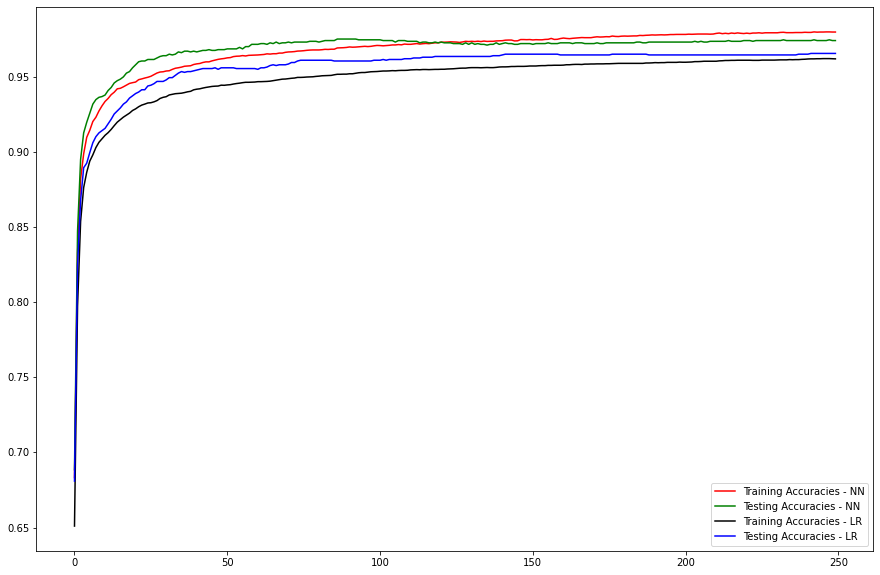

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

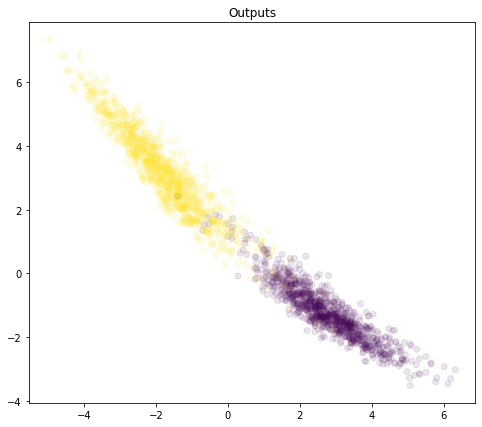

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

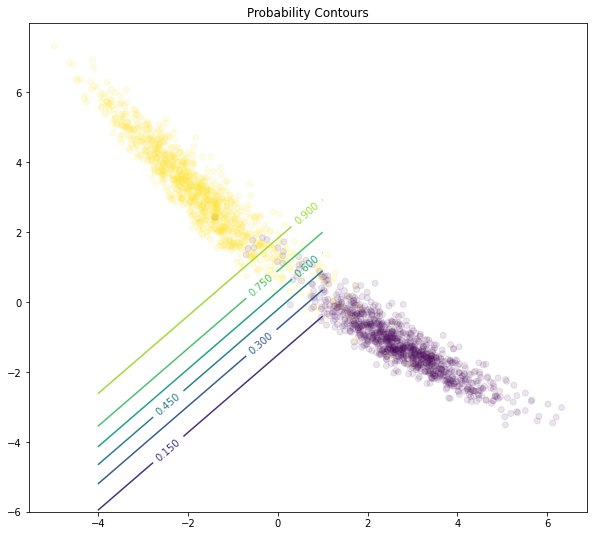

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );